### 1.Importing modules that interact with the database.

In [1]:
import psycopg2
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from IPython.display import FileLink

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
conn = psycopg2.connect("dbname=myduka user=postgres password=Candidcoco@20")

In [4]:
df = pd.read_sql_query("SELECT sales.id as sales_id, product_name, buying_price, selling_price, sales.quantity as sales_quantity, created_at as sales_created_at FROM products,sales WHERE products.id = sales.pid", conn)

### 2.Set column index

In [5]:
df.set_index('sales_id', inplace=True,verify_integrity=False)

### 3.Checking data types.

In [6]:
df.dtypes

product_name                object
buying_price                 int64
selling_price                int64
sales_quantity               int64
sales_created_at    datetime64[ns]
dtype: object

### 4.Cleaning up columns to follow programming naming.

In [7]:
df.columns.to_list()

['product_name',
 'buying_price',
 'selling_price',
 'sales_quantity',
 'sales_created_at']

### 5.Removing duplicates

In [8]:
df.shape

(50, 5)

In [9]:
new_df = df.append(df)
new_df.shape

(100, 5)

In [10]:
new_df = df.drop_duplicates()
new_df.shape

(50, 5)

### 6.Cleaning up columns.

In [11]:
df.columns.map(str.lower,na_action='ignore')

Index(['product_name', 'buying_price', 'selling_price', 'sales_quantity',
       'sales_created_at'],
      dtype='object')

### 7.Dealing with null values.

### 8.Summary statistics.

In [12]:
df.corr()

,buying_price,selling_price,sales_quantity
buying_price,1.000000,-0.063809,0.072640
selling_price,-0.063809,1.000000,0.124686
sales_quantity,0.072640,0.124686,1.000000


### 9. Creating new columns.

In [13]:
df['profit'] = df['selling_price'] - df['buying_price'] * df['sales_quantity']

In [14]:
df.head(15)

,product_name,buying_price,selling_price,sales_quantity,sales_created_at,profit
sales_id,,,,,,
1,Vinegar - Tarragon,65,21,23,2022-11-13,-1474
2,Cloves - Whole,33,75,12,2022-08-31,-321
3,"Pail - 15l White, With Handle",47,10,92,2022-12-29,-4314
4,"Chocolate - Pistoles, Lactee, Milk",75,37,17,2023-04-08,-1238
5,Cassis,16,82,100,2023-05-25,-1518
6,Sage Derby,11,18,85,2023-04-16,-917
7,Nantucket - Pomegranate Pear,53,25,58,2022-08-25,-3049
8,Carbonated Water - Raspberry,84,11,87,2023-03-05,-7297
9,Milkettes - 2%,25,32,35,2023-01-12,-843


In [15]:
df['Selling_Price'] = df['buying_price'] * 0.25

In [16]:
df['Profit'] = df['Selling_Price'] - df['buying_price'] * df['sales_quantity']

In [17]:
df.head(10)

,product_name,buying_price,selling_price,sales_quantity,sales_created_at,profit,Selling_Price,Profit
sales_id,,,,,,,,
1,Vinegar - Tarragon,65,21,23,2022-11-13,-1474,16.25,-1478.75
2,Cloves - Whole,33,75,12,2022-08-31,-321,8.25,-387.75
3,"Pail - 15l White, With Handle",47,10,92,2022-12-29,-4314,11.75,-4312.25
4,"Chocolate - Pistoles, Lactee, Milk",75,37,17,2023-04-08,-1238,18.75,-1256.25
5,Cassis,16,82,100,2023-05-25,-1518,4.00,-1596.00
6,Sage Derby,11,18,85,2023-04-16,-917,2.75,-932.25
7,Nantucket - Pomegranate Pear,53,25,58,2022-08-25,-3049,13.25,-3060.75
8,Carbonated Water - Raspberry,84,11,87,2023-03-05,-7297,21.00,-7287.00
9,Milkettes - 2%,25,32,35,2023-01-12,-843,6.25,-868.75


In [18]:
sales = df['Profit'].sum()

In [19]:
sales

-133234.25

### 10. Filter for items with positive profitability and then get top 5 by sales

In [20]:
# Display the first five items with the most sales
top_products = df.nlargest(5,'sales_quantity')

In [21]:
top_products

,product_name,buying_price,selling_price,sales_quantity,sales_created_at,profit,Selling_Price,Profit
sales_id,,,,,,,,
5,Cassis,16,82,100,2023-05-25,-1518,4.00,-1596.00
34,Wiberg Super Cure,20,67,100,2023-06-22,-1933,5.00,-1995.00
36,Beef - Prime Rib Aaa,69,62,99,2023-06-26,-6769,17.25,-6813.75
43,Bread Ww Cluster,44,62,98,2023-03-05,-4250,11.00,-4301.00
3,"Pail - 15l White, With Handle",47,10,92,2022-12-29,-4314,11.75,-4312.25


### 11. Group by month and calculate total sales for each month

In [22]:
best_performing_month = df.groupby(df['sales_created_at'].dt.to_period('M')).sum()

### Find the month with the highest total sales

In [23]:
best_performing_month

,buying_price,selling_price,sales_quantity,profit,Selling_Price,Profit
sales_created_at,,,,,,
2022-08,200,177,198,-9731,50.00,-9858.00
2022-09,188,79,135,-12857,47.00,-12889.00
2022-10,49,97,24,-1079,12.25,-1163.75
2022-11,117,164,168,-3521,29.25,-3655.75
2022-12,151,241,323,-12035,37.75,-12238.25
2023-01,133,247,164,-4330,33.25,-4543.75
2023-02,101,123,102,-6497,25.25,-6594.75
2023-03,299,349,386,-19665,74.75,-19939.25
2023-04,262,271,300,-10607,65.50,-10812.50


In [24]:
best_performing_month['sales_quantity'].idxmax()

Period('2023-07', 'M')

### 12. Create the plot using Pandas' plotting function

Text(0.5, 1.0, 'Total Sales per Product')

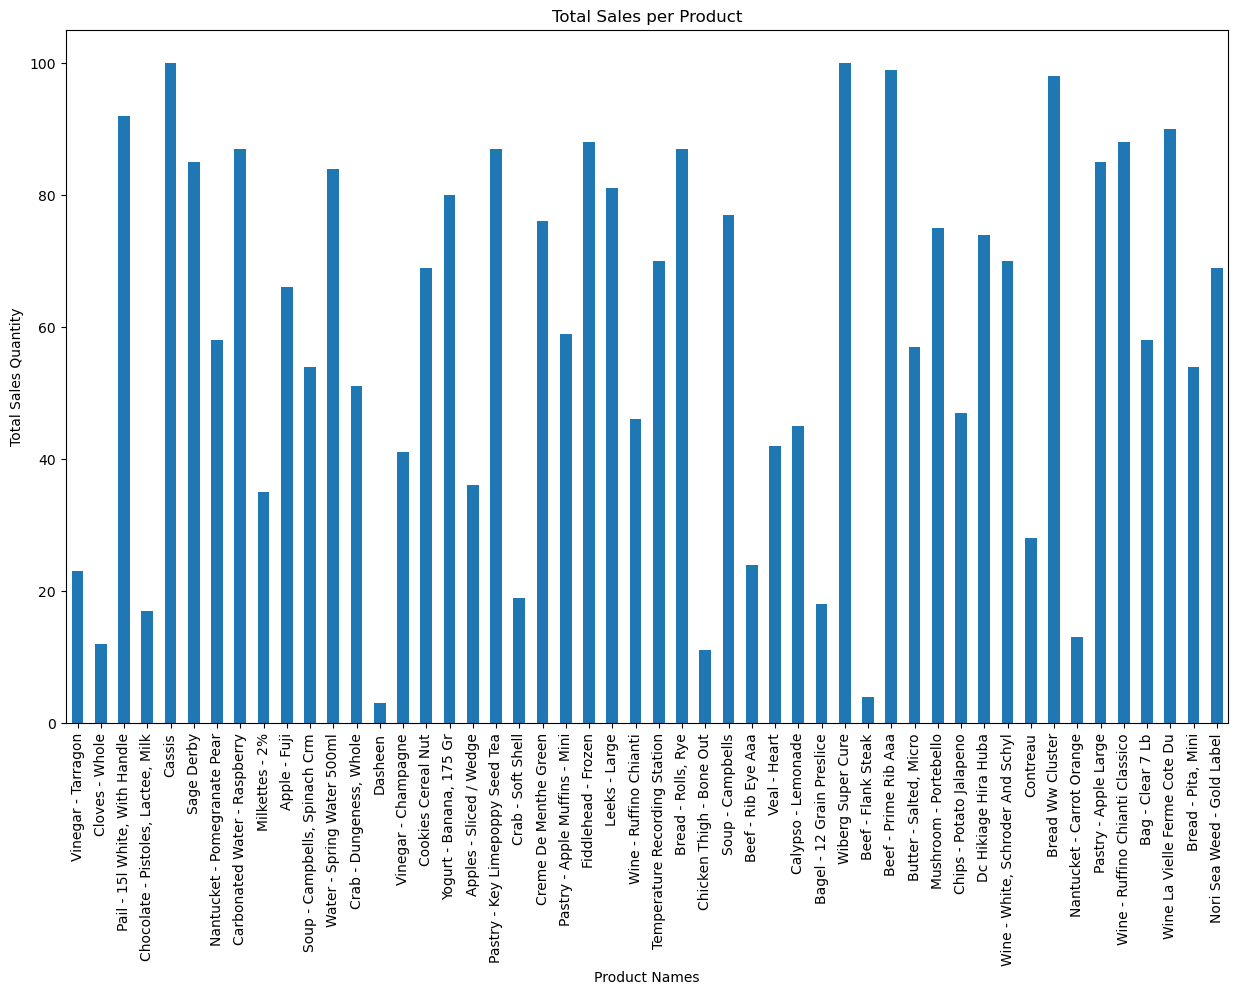

In [25]:
df.plot.bar('product_name','sales_quantity',legend=False,rot=90,figsize=(15,9))
plt.xlabel('Product Names')
plt.ylabel('Total Sales Quantity')
plt.title('Total Sales per Product')

In [26]:
df['buying_price'].corr(df['Profit']) #pearson correlation

-0.7831228279735392

In [27]:
# Calculate Spearman's rank correlation coefficient
spearman_corr = df['buying_price'].corr(df['Profit'], method='spearman')

In [28]:
spearman_corr

-0.7922942863529467

In [29]:
# Calculate the average profit for each product name --- correlation between product name and profit
df.groupby('product_name')['Profit'].mean()

product_name
Apple - Fuji                         -2104.00
Apples - Sliced / Wedge              -3396.25
Bag - Clear 7 Lb                      -577.50
Bagel - 12 Grain Preslice             -248.50
Beef - Flank Steak                    -165.00
Beef - Prime Rib Aaa                 -6813.75
Beef - Rib Eye Aaa                   -1163.75
Bread - Pita, Mini                   -2311.25
Bread - Rolls, Rye                    -520.50
Bread Ww Cluster                     -4301.00
Butter - Salted, Micro               -1475.50
Calypso - Lemonade                   -1566.25
Carbonated Water - Raspberry         -7287.00
Cassis                               -1596.00
Chicken Thigh - Bone Out              -150.50
Chips - Potato Jalapeno              -4114.00
Chocolate - Pistoles, Lactee, Milk   -1256.25
Cloves - Whole                        -387.75
Contreau                              -777.00
Cookies Cereal Nut                   -4056.25
Crab - Dungeness, Whole              -4567.50
Crab - Soft Shell    

Text(0.5, 1.0, 'Total Sales per Month')

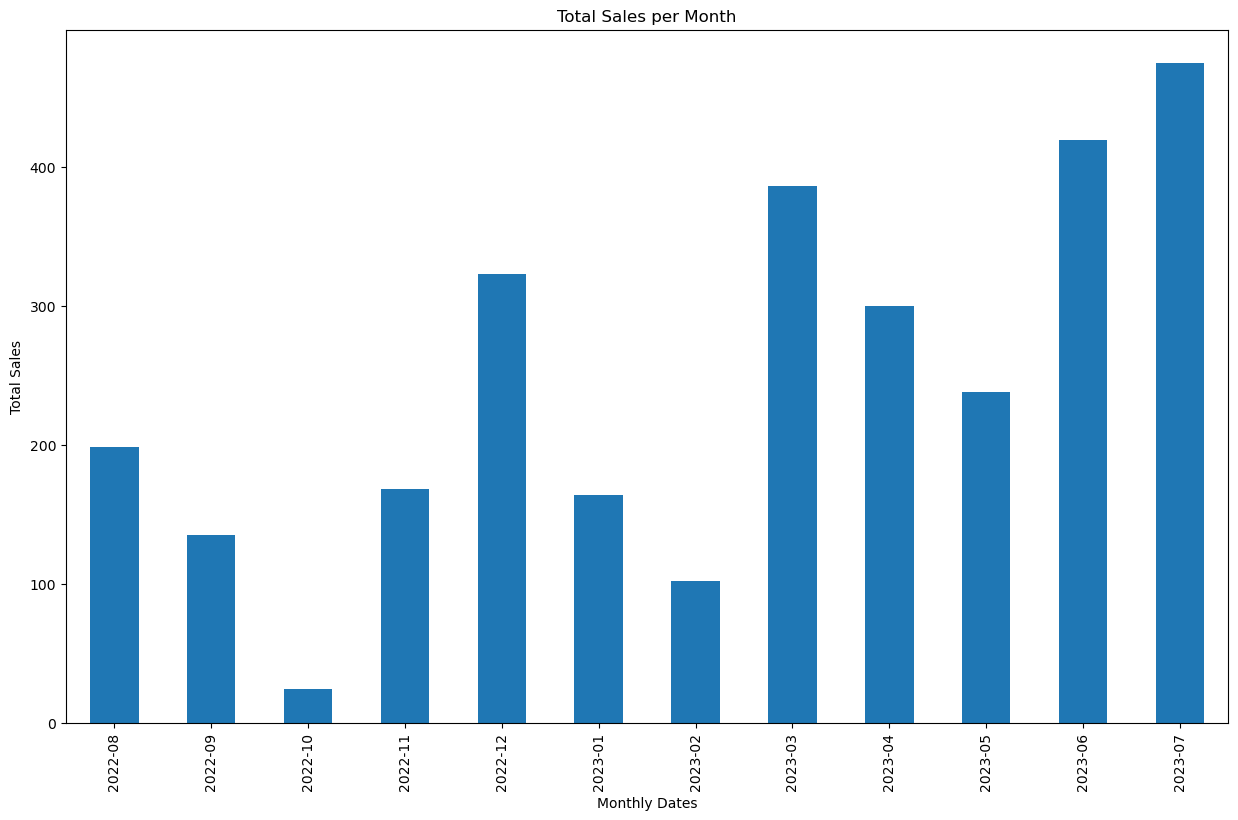

In [30]:
# Group by the month extracted from the 'Date' column and sum the 'Sales' within each group
grouped_df = df.groupby(df['sales_created_at'].dt.to_period('M'))['sales_quantity'].sum()

# Create a bar plot
grouped_df.plot(kind='bar', rot=90, figsize=(15,9)) 
plt.xlabel('Monthly Dates')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')

In [31]:
columns_to_drop = ['selling_price', 'profit']
df.drop(columns=columns_to_drop, inplace=True)

In [32]:
df.to_csv('duka_sales_cleaned.csv',index = False)

In [33]:
# Read the CSV file into a DataFrame
df = pd.read_csv('duka_sales_cleaned.csv')

# Display the first few rows of the DataFrame
df.head(10)

,product_name,buying_price,sales_quantity,sales_created_at,Selling_Price,Profit
0,Vinegar - Tarragon,65,23,2022-11-13,16.25,-1478.75
1,Cloves - Whole,33,12,2022-08-31,8.25,-387.75
2,"Pail - 15l White, With Handle",47,92,2022-12-29,11.75,-4312.25
3,"Chocolate - Pistoles, Lactee, Milk",75,17,2023-04-08,18.75,-1256.25
4,Cassis,16,100,2023-05-25,4.00,-1596.00
5,Sage Derby,11,85,2023-04-16,2.75,-932.25
6,Nantucket - Pomegranate Pear,53,58,2022-08-25,13.25,-3060.75
7,Carbonated Water - Raspberry,84,87,2023-03-05,21.00,-7287.00
8,Milkettes - 2%,25,35,2023-01-12,6.25,-868.75
9,Apple - Fuji,32,66,2023-04-26,8.00,-2104.00


In [34]:
from pathlib import Path
filepath = Path('datascience/csv files/duka_sales_cleaned.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)  